In [1]:
import mysql.connector as connector
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = connector.connect(
  host="localhost",
  user="CodeBenji",
  password="Code!12345",
  database="sncf_meteo"
)

In [3]:
objets_perdus = pd.read_sql("SELECT * FROM ObjetsPerdus", conn)
frequentations = pd.read_sql("SELECT * FROM Frequentations", conn)
meteos = pd.read_sql("SELECT * FROM Meteos", conn)

/tmp/ipykernel_220150/1129881420.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  objets_perdus = pd.read_sql("SELECT * FROM ObjetsPerdus", conn)
/tmp/ipykernel_220150/1129881420.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frequentations = pd.read_sql("SELECT * FROM Frequentations", conn)
/tmp/ipykernel_220150/1129881420.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  meteos = pd.read_sql("SELECT * FROM Meteos", conn)


In [4]:
objets_perdus["date"] = pd.to_datetime(objets_perdus["date"])
objets_perdus.set_index("date", inplace=True)

objets_perdus

,id,type_objet,gare,nature_objet
date,,,,
2017-12-31 22:25:22,0087484006,"Vêtements, chaussures",Angers Saint-Laud,"Foulard, écharpe"
2017-12-31 21:22:31,0087484006,Pièces d'identités et papiers personnels,Angers Saint-Laud,"Carte d'identité, passeport, permis de conduire"
2017-12-31 20:59:09,0087485003,Divers,La Rochelle,Autres divers
2017-12-31 20:55:56,0087485003,"Appareils électroniques, informatiques, appare...",La Rochelle,"Appareil audio portable (lecteur de CD, balade..."
2017-12-31 20:52:33,0087485003,Divers,La Rochelle,Autres divers
...,...,...,...,...
2021-12-01 07:24:00,0087683268,Articles médicaux,Laroche - Migennes,Radiographie
2021-12-01 07:11:54,0087212027,"Bagagerie: sacs, valises, cartables",Strasbourg,"Sac de voyage, sac de sport, sac à bandoulière"
2021-12-01 05:44:51,0087411017,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,"Clés, porte-clés"


In [5]:
objets_perdus['id'].nunique()

168

In [6]:
objets_perdus['gare'].value_counts()

Paris Gare de Lyon      24519
Paris Montparnasse      23322
Paris Gare du Nord      16329
Bordeaux Saint-Jean     13058
Paris Saint-Lazare      12128
                        ...  
Coutances                   3
Abbeville                   1
Étaples - Le Touquet        1
Alençon                     1
Yvetot                      1
Name: gare, Length: 168, dtype: int64

In [7]:
objets_perdus.index

DatetimeIndex(['2017-12-31 22:25:22', '2017-12-31 21:22:31',
               '2017-12-31 20:59:09', '2017-12-31 20:55:56',
               '2017-12-31 20:52:33', '2017-12-31 20:37:26',
               '2017-12-31 20:24:23', '2017-12-31 20:06:12',
               '2017-12-31 19:31:06', '2017-12-31 19:25:17',
               ...
               '2021-12-01 07:58:37', '2021-12-01 07:55:19',
               '2021-12-01 07:53:04', '2021-12-01 07:47:58',
               '2021-12-01 07:36:22', '2021-12-01 07:24:00',
               '2021-12-01 07:11:54', '2021-12-01 05:44:51',
               '2021-12-01 05:25:12', '2021-12-01 05:17:06'],
              dtype='datetime64[ns]', name='date', length=295171, freq=None)

In [8]:
objets_semaine = objets_perdus.groupby(pd.Grouper(freq='W')).count()

objets_semaine.drop(['id', 'gare', 'nature_objet'], axis=1, inplace=True)

objets_semaine

,type_objet
date,
2017-12-03,105
2017-12-10,1791
2017-12-17,1831
2017-12-24,1885
2017-12-31,1718
...,...
2021-12-05,1277
2021-12-12,1358
2021-12-19,1462


In [9]:
len(objets_semaine)

214

<AxesSubplot: ylabel='Count'>

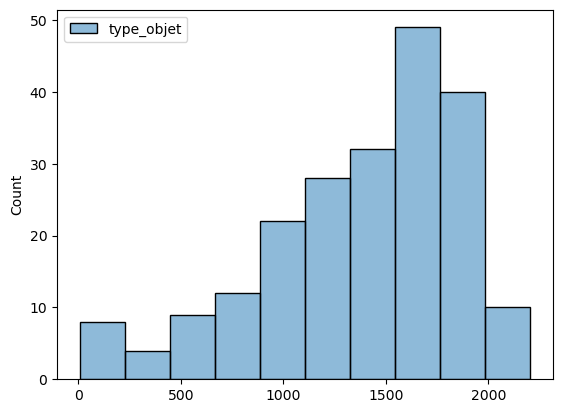

In [10]:
sns.histplot(data=objets_semaine)

In [11]:
evolution = objets_perdus.reset_index().copy()
evolution['date'] = evolution['date'].dt.strftime("%Y-%m")

evolution.set_index('date', inplace=True)

evolution

,id,type_objet,gare,nature_objet
date,,,,
2017-12,0087484006,"Vêtements, chaussures",Angers Saint-Laud,"Foulard, écharpe"
2017-12,0087484006,Pièces d'identités et papiers personnels,Angers Saint-Laud,"Carte d'identité, passeport, permis de conduire"
2017-12,0087485003,Divers,La Rochelle,Autres divers
2017-12,0087485003,"Appareils électroniques, informatiques, appare...",La Rochelle,"Appareil audio portable (lecteur de CD, balade..."
2017-12,0087485003,Divers,La Rochelle,Autres divers
...,...,...,...,...
2021-12,0087683268,Articles médicaux,Laroche - Migennes,Radiographie
2021-12,0087212027,"Bagagerie: sacs, valises, cartables",Strasbourg,"Sac de voyage, sac de sport, sac à bandoulière"
2021-12,0087411017,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,"Clés, porte-clés"


In [12]:
evolution = evolution.groupby(by=['type_objet', 'date']).count()

del evolution['id']
del evolution['gare']

evolution

nature_objet
type_objet                                         date                 
Appareils électroniques, informatiques, apparei... 2017-12           973
                                                   2018-01          1150
                                                   2018-02          1086
                                                   2018-03          1069
                                                   2018-04           811
...                                                                  ...
Vêtements, chaussures                              2021-08           897
                                                   2021-09           873
                                                   2021-10           773
                                                   2021-11           502
                                                   2021-12           460

[777 rows x 1 columns]

/tmp/ipykernel_220150/531021346.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


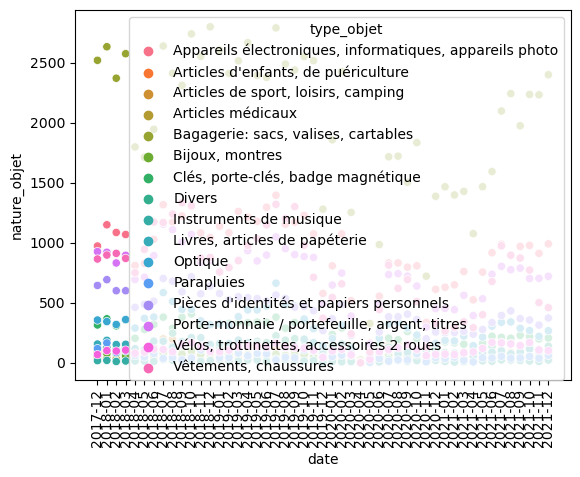

In [13]:
sns.scatterplot(x='date', y='nature_objet', data=evolution, hue="type_objet")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=10)
plt.show()

In [14]:
import plotly.express as px

In [15]:
evolution.reset_index(inplace=True)

In [16]:
px.scatter(evolution, x='date', y='nature_objet',
            color='type_objet',
            title="Nombre d'objet perdu par type d'objet :"
)

In [24]:
objets_perdus

,id,type_objet,gare,nature_objet
date,,,,
2017-12-31 22:25:22,0087484006,"Vêtements, chaussures",Angers Saint-Laud,"Foulard, écharpe"
2017-12-31 21:22:31,0087484006,Pièces d'identités et papiers personnels,Angers Saint-Laud,"Carte d'identité, passeport, permis de conduire"
2017-12-31 20:59:09,0087485003,Divers,La Rochelle,Autres divers
2017-12-31 20:55:56,0087485003,"Appareils électroniques, informatiques, appare...",La Rochelle,"Appareil audio portable (lecteur de CD, balade..."
2017-12-31 20:52:33,0087485003,Divers,La Rochelle,Autres divers
...,...,...,...,...
2021-12-01 07:24:00,0087683268,Articles médicaux,Laroche - Migennes,Radiographie
2021-12-01 07:11:54,0087212027,"Bagagerie: sacs, valises, cartables",Strasbourg,"Sac de voyage, sac de sport, sac à bandoulière"
2021-12-01 05:44:51,0087411017,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,"Clés, porte-clés"


In [23]:
frequentations 

,id_gare,code_postal,nom_gare,region,voyageurs_2016,voyageurs_2017,voyageurs_2018,voyageurs_2019,voyageurs_2020,voyageurs_2021
0,87313759,60220,Abancourt,60,82192,87520,80456,85370,64792,103622
1,87381657,78260,Achères Ville,78,6909134,6995230,6957718,6936416,3195034,4901110
2,87781278,34300,Agde,34,1486476,1568455,1323669,1220148,887355,1262610
3,87741421,73610,Aiguebelette-le-Lac,73,7824,6234,5070,9508,5842,7316
4,87586693,47190,Aiguillon,47,180374,193818,185380,218188,179232,213528
...,...,...,...,...,...,...,...,...,...,...
213835,87473116,22120,Yffiniac,22,78376,66444,55822,57568,38132,44048
213836,87671487,40100,Ygos-Saint-Saturnin,40,54584,59686,52406,49688,48516,65706
213837,87645101,15130,Ytrac,15,68,50,52,98,34,74
213838,87191304,57110,Yutz,57,3860,2600,2968,2372,1608,1746
